# I. Classification

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [36]:
import pandas as pd

In [5]:
digits = datasets.load_digits()

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

In [7]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 1. k-Nearest Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
predicts = neigh.predict(X_test)

In [24]:
from sklearn import metrics

In [31]:
neigh.score(X_train, y_train)

0.9853862212943633

In [32]:
train_results, test_results = [], []

for i in range(1, 9):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    train_results.append(neigh.score(X_train, y_train))
    predicts = neigh.predict(X_test)
    test_results.append(metrics.accuracy_score(y_test, predicts))

In [106]:
test_results

[0.9833333333333333,
 0.9805555555555555,
 0.9833333333333333,
 0.9861111111111112,
 0.9805555555555555,
 0.9861111111111112,
 0.9888888888888889,
 0.9861111111111112]

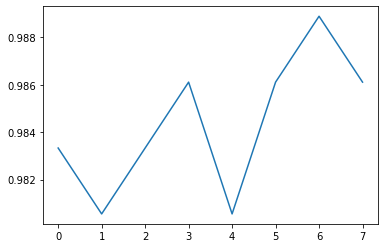

In [29]:
plt.plot(results)
plt.show()

In [42]:
tups = list(zip(train_results, test_results))
df = pd.DataFrame(tups, columns=["Training accuracy", "Testing Accuracy"])

In [43]:
import seaborn as sns

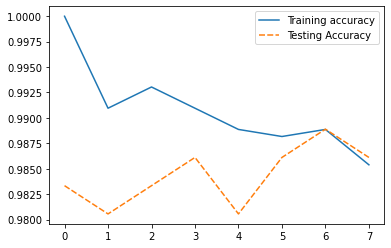

In [44]:
sns.lineplot(data=df)

## 2. Support Vector Machine

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [49]:
svm = SVC()
cv_performance = cross_val_score(svm, X_train, y_train, cv=10)
test_performance = svm.fit(X_train, y_train).score(X_test, y_test)

In [50]:
test_performance

0.9916666666666667

In [52]:
np.mean(cv_performance)

0.9853923853923854

### Find the best kernel from 3 - linear, rbf and sigmoid by using metrics.classification_report

In [90]:
linear_svm = SVC(kernel='linear')
linear_cv_performance = cross_val_score(linear_svm, X_train, y_train, cv=10)
linear_test_performance = linear_svm.fit(X_train, y_train).score(X_test, y_test)

In [91]:
y_pred = linear_svm.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0]
 [ 0  1 38  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0]
 [ 0  2  0  0  1  0  1  0 33  0]
 [ 0  0  0  0  0  2  0  0  0 26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.93      1.00      0.96        39
           2       1.00      0.97      0.99        39
           3       1.00      1.00      1.00        43
           4       0.98      1.00      0.99        41
           5       0.95      1.00      0.98        41
           6       0.96      1.00      0.98        27
           7       1.00      1.00      1.00        29
           8       1.00      0.89      0.94        37
           9       1.00      0.93      0.96        28

    accuracy                           0.98       360
   macro avg       

In [92]:
rbf_svm = SVC(kernel='rbf')
rbf_cv_performance = cross_val_score(rbf_svm, X_train, y_train, cv=10)
rbf_test_performance = rbf_svm.fit(X_train, y_train).score(X_test, y_test)

In [93]:
y_pred = rbf_svm.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 40  1  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0]
 [ 0  2  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0  0  0 28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        39
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        41
           5       1.00      0.98      0.99        41
           6       0.96      1.00      0.98        27
           7       1.00      1.00      1.00        29
           8       1.00      0.95      0.97        37
           9       1.00      1.00      1.00        28

    accuracy                           0.99       360
   macro avg       

In [94]:
sigmoid_svm = SVC(kernel='sigmoid')
sigmoid_cv_performance = cross_val_score(sigmoid_svm, X_train, y_train, cv=10)
sigmoid_test_performance = sigmoid_svm.fit(X_train, y_train).score(X_test, y_test)

In [95]:
y_pred = sigmoid_svm.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[35  0  0  0  1  0  0  0  0  0]
 [ 0 34  0  0  3  0  0  1  1  0]
 [ 0  4 35  0  0  0  0  0  0  0]
 [ 0  3  0 37  0  0  0  0  3  0]
 [ 1  2  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 40  1  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0]
 [ 0  0  0  0  0  1  0 28  0  0]
 [ 0  5  1  1  0  0  1  0 27  2]
 [ 0  3  0  1  0  0  0  1  2 21]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.67      0.87      0.76        39
           2       0.97      0.90      0.93        39
           3       0.95      0.86      0.90        43
           4       0.90      0.93      0.92        41
           5       0.98      0.98      0.98        41
           6       0.93      1.00      0.96        27
           7       0.93      0.97      0.95        29
           8       0.82      0.73      0.77        37
           9       0.91      0.75      0.82        28

    accuracy                           0.89       360
   macro avg       

### Using GridSearchCV to find the best kernel from 3 - linear, rbf and sigmoid

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
learning_algo = SVC(kernel='linear', random_state=101)

In [63]:
search_space = [{'kernel':['linear']}, 
            {'kernel':['rbf']}, 
            {'kernel':['sigmoid']}]

In [64]:
gridsearch = GridSearchCV(learning_algo, param_grid=search_space, refit=True, cv=10)

In [65]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='linear', random_state=101),
             param_grid=[{'kernel': ['linear']}, {'kernel': ['rbf']},
                         {'kernel': ['sigmoid']}])

In [66]:
print (f'Best parameter: {gridsearch.best_params_}')

Best parameter: {'kernel': 'rbf'}


In [67]:
cv_performance = gridsearch.best_score_
test_performance = gridsearch.score(X_test, y_test)

In [68]:
print (f'Cross-validation accuracy score: {cv_performance}, test accuracy score: {test_performance}')

Cross-validation accuracy score: 0.9853923853923854, test accuracy score: 0.9916666666666667


It is the best to use rbf kernel. 

## 3. Naïve Bayes

In [97]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train.ravel())

MultinomialNB()

In [99]:
y_pred = clf.predict(X_test)
y_true = y_test.ravel()

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.8861111111111111

In [102]:
print(confusion_matrix(y_true, y_pred))

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 34  2  0  0  0  1  0  2  0]
 [ 0  3 30  0  0  0  0  0  4  2]
 [ 0  0  2 35  0  0  0  1  4  1]
 [ 0  0  0  0 40  0  0  1  0  0]
 [ 0  0  0  0  0 35  1  1  0  4]
 [ 0  0  0  0  0  0 27  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0]
 [ 0  4  0  0  1  0  1  0 31  0]
 [ 0  1  0  1  0  0  0  2  2 22]]


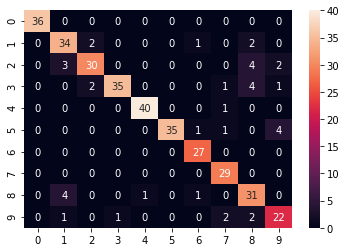

In [104]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)

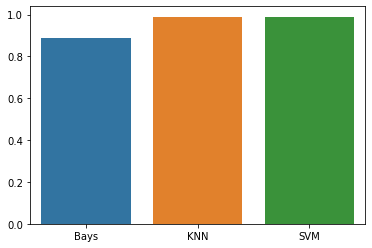

In [127]:
# Bays, KNN, SVM
acc = {"Bays":0.8861111111111111, "KNN":0.9888888888888889, "SVM":0.99}
# plt.bar(acc, height=10, width=0.2)
df = pd.DataFrame([acc])
sns.barplot(data=df)

# II. Regression

## 1. LinearRegression

In [128]:
df = pd.read_csv('gapminder.csv')

In [134]:
df.head(3)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America


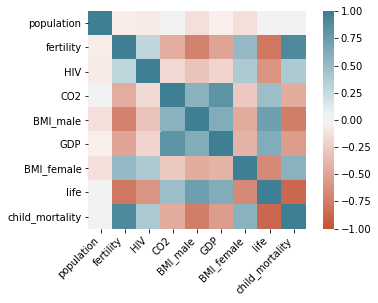

In [144]:
corr = df.drop(columns=['Region']).corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Coefficients: 
 [-8.52093654e-10]
Mean squared error: 81.52
Coefficient of determination: -0.07


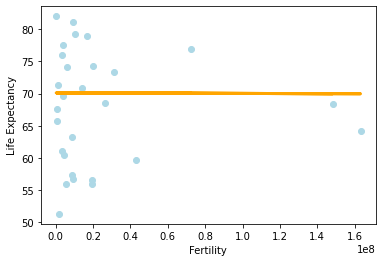

In [207]:
X = df['population']
y = df['life']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression()
reg.fit(X_train.values.reshape(-1,1), y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test.values.reshape(-1,1))

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='lightblue')
plt.plot(X_test, y_pred, color='orange', linewidth=3)

plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')

# plt.xticks(())
# plt.yticks(())

plt.show()

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [178]:
X = df['fertility']
y = df['life']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [183]:
reg = LinearRegression()
reg.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

Coefficients: 
 [-4.38069442]
Mean squared error: 17.68
Coefficient of determination: 0.77


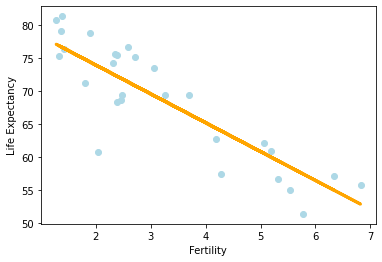

In [197]:
# Make predictions using the testing set
y_pred = reg.predict(X_test.values.reshape(-1,1))

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='lightblue')
plt.plot(X_test, y_pred, color='orange', linewidth=3)

plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')

# plt.xticks(())
# plt.yticks(())

plt.show()

Coefficients: 
 [-1.23787475]
Mean squared error: 53.43
Coefficient of determination: 0.19


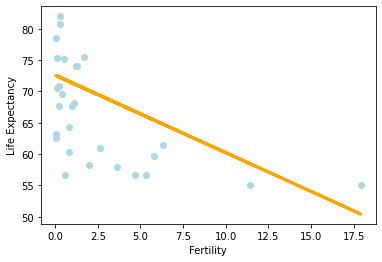

In [199]:
X = df['HIV']
y = df['life']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression()
reg.fit(X_train.values.reshape(-1,1), y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test.values.reshape(-1,1))

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='lightblue')
plt.plot(X_test, y_pred, color='orange', linewidth=3)

plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')

# plt.xticks(())
# plt.yticks(())

plt.show()

Coefficients: 
 [0.67370539]
Mean squared error: 55.64
Coefficient of determination: -0.03


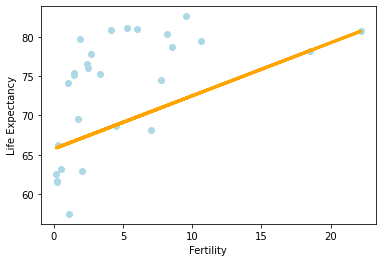

In [200]:
X = df['CO2']
y = df['life']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression()
reg.fit(X_train.values.reshape(-1,1), y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test.values.reshape(-1,1))

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='lightblue')
plt.plot(X_test, y_pred, color='orange', linewidth=3)

plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')

# plt.xticks(())
# plt.yticks(())

plt.show()

Coefficients: 
 [3.12965744]
Mean squared error: 27.90
Coefficient of determination: 0.52


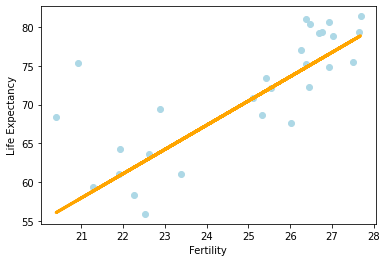

In [201]:
X = df['BMI_male']
y = df['life']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression()
reg.fit(X_train.values.reshape(-1,1), y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test.values.reshape(-1,1))

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='lightblue')
plt.plot(X_test, y_pred, color='orange', linewidth=3)

plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')

# plt.xticks(())
# plt.yticks(())

plt.show()

Coefficients: 
 [-1.40743076]
Mean squared error: 53.02
Coefficient of determination: 0.29


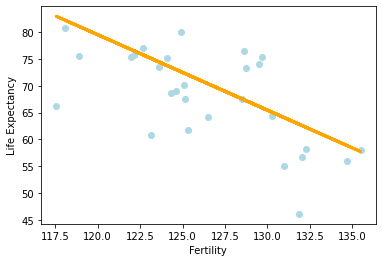

In [202]:
X = df['BMI_female']
y = df['life']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression()
reg.fit(X_train.values.reshape(-1,1), y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test.values.reshape(-1,1))

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='lightblue')
plt.plot(X_test, y_pred, color='orange', linewidth=3)

plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')

# plt.xticks(())
# plt.yticks(())

plt.show()

Coefficients: 
 [-0.17339168]
Mean squared error: 11.13
Coefficient of determination: 0.76


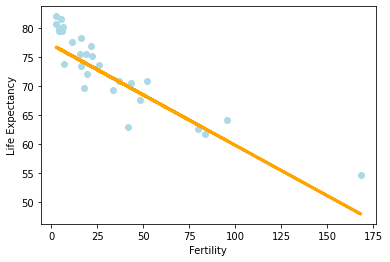

In [203]:
X = df['child_mortality']
y = df['life']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression()
reg.fit(X_train.values.reshape(-1,1), y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test.values.reshape(-1,1))

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='lightblue')
plt.plot(X_test, y_pred, color='orange', linewidth=3)

plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')

# plt.xticks(())
# plt.yticks(())

plt.show()

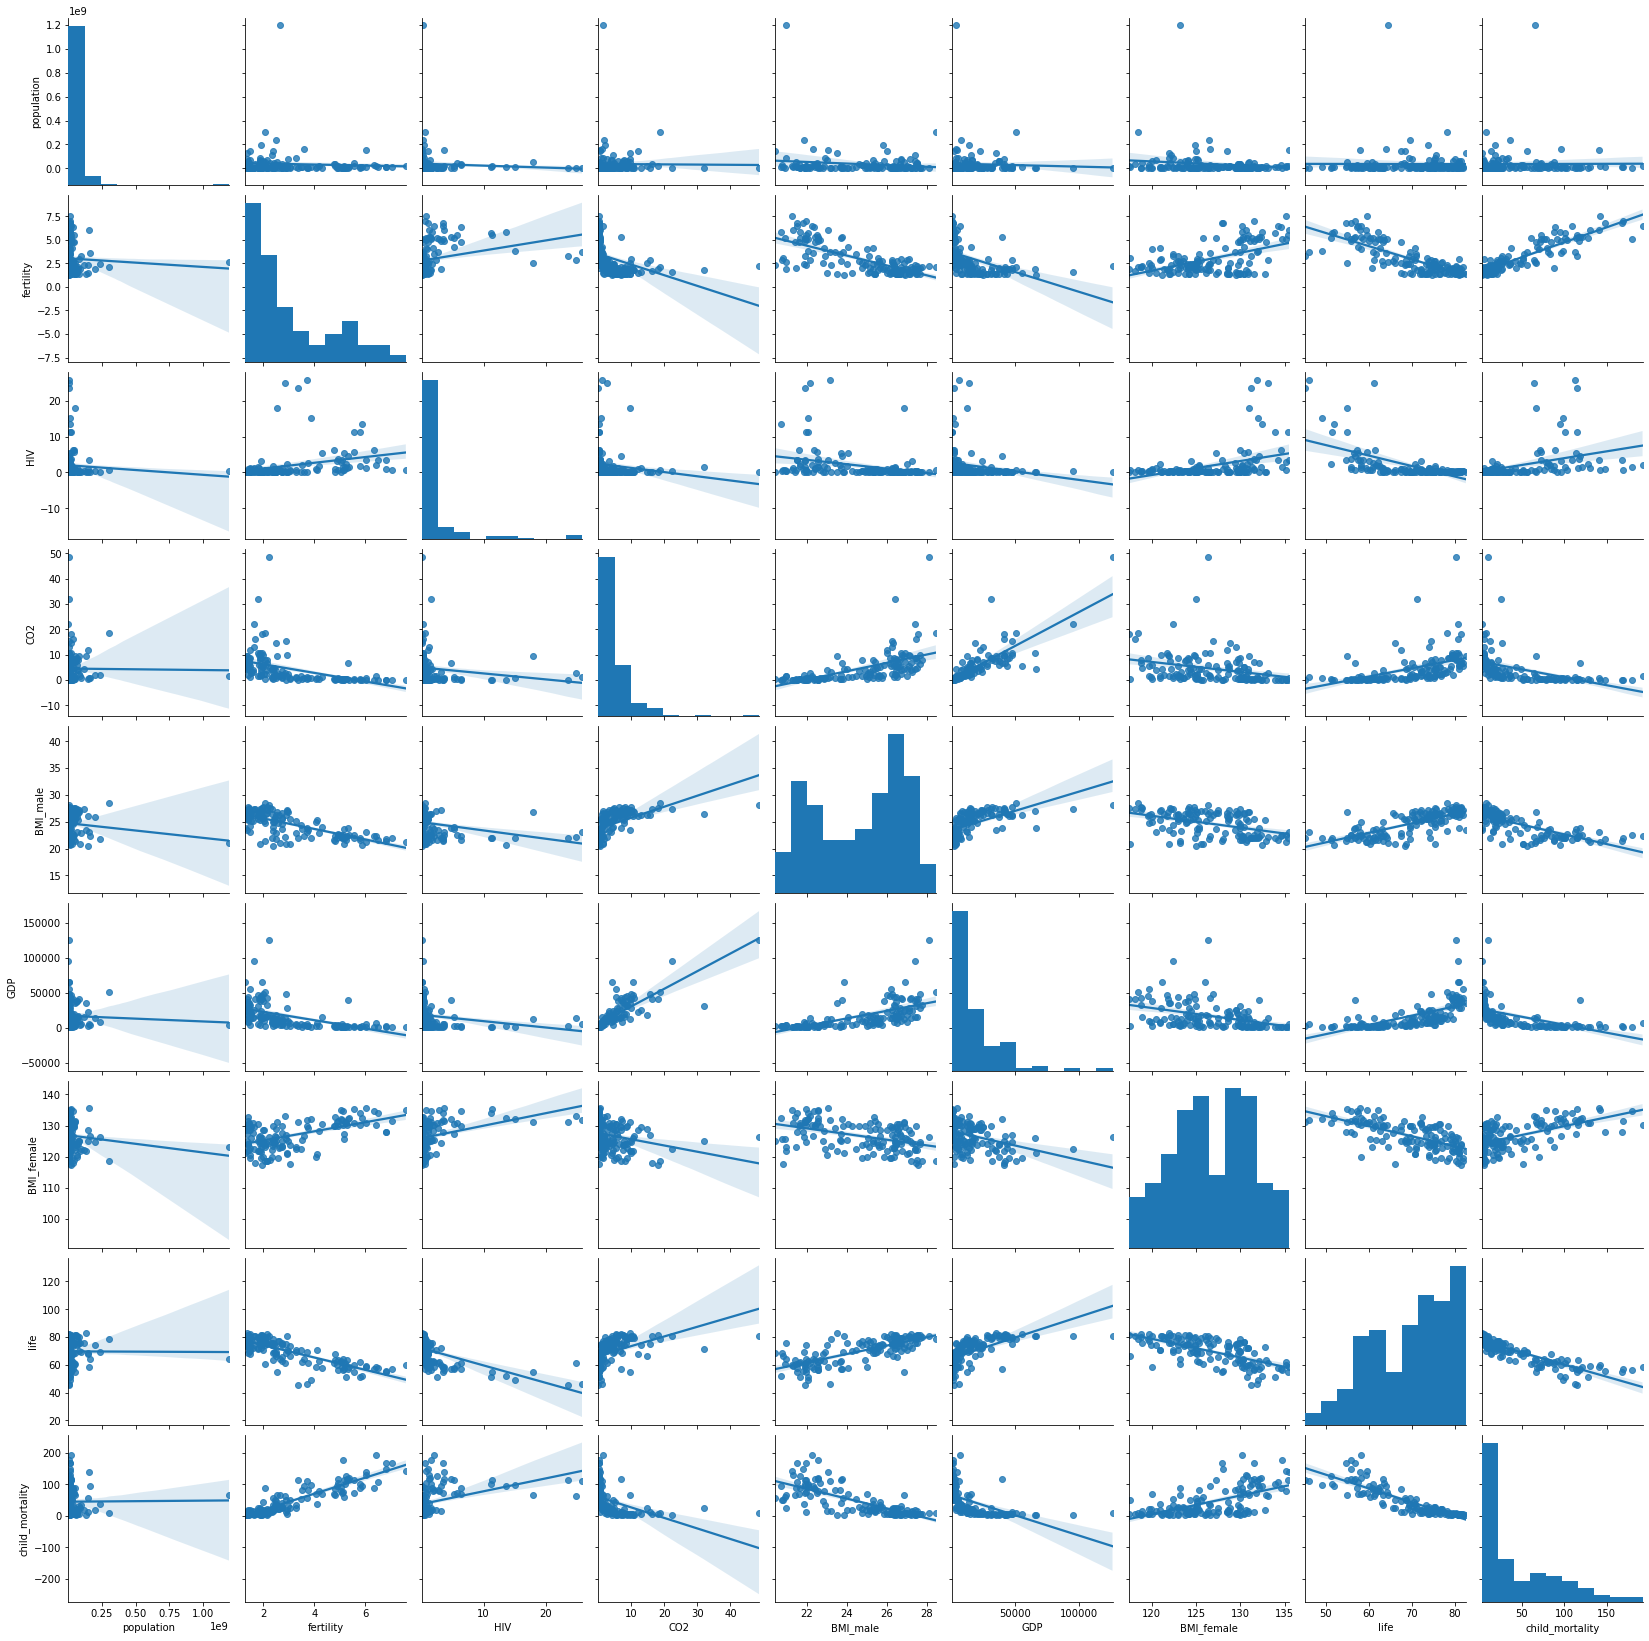

In [150]:
g = sns.pairplot(df.drop(columns=['Region']), kind="reg")

## 2. LogisticRegression

In [239]:
!ls -a

.                      .creditcard.csv.icloud Week3_Workshop.ipynb
..                     .ipynb_checkpoints     gapminder.csv
.DS_Store              Lab3.pdf


In [241]:
cc_df = pd.read_csv('creditcard.csv')

In [245]:
frauds = df.loc[cc_df['Class'] == 1]
non_frauds = df.loc[cc_df['Class'] == 0]

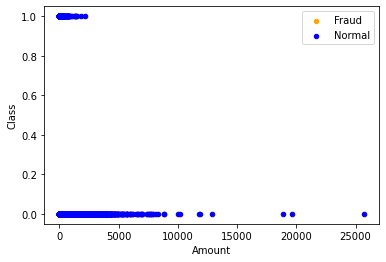

In [251]:
ax = cc_df.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
cc_df.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

In [252]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [254]:
X = cc_df.iloc[:,:-1]
y = cc_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [255]:
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)
print("Accuracy: ", logistic.score(X_test, y_test))

Accuracy:  0.9991071697280379


/Users/katyang/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0.5, 42.0, 'Predicted label')

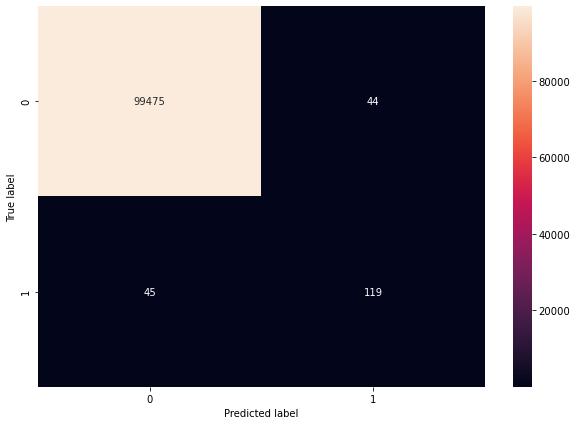

In [256]:
import seaborn as sns
y_predicted = logistic.predict(X_test)
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_test, y_predicted)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
